In [1]:
from vivarium import Vivarium
from vivarium.tests import TOY_PROCESSES

In [2]:
v = Vivarium(emitter='none', processes=TOY_PROCESSES)

In [3]:
# v.add_node('A', 1)

In [4]:
print(v)

Vivarium({'global_time': 0.0})


In [5]:
v.save_graph()

In [6]:
v.print_types()

['', 'length^3/time', 'length^0_5*mass^0_5/time', 'current*time', 'time/length', 'length*time/mass', 'length*mass/current^2*time^2', 'mass/time^2', 'current*length*time', 'length^2*mass/current^2*time^3', 'step', 'current^2*time^3/length^2*mass', 'schema', 'luminosity', 'current*length^2*time', 'process', 'current*time^2/length^2*mass', 'length^3/mass*time^2', 'current*time/mass', 'enum', 'substance', 'union', 'current', 'mass^0_5/length^0_5*time', 'length^2*mass/time^3', 'current^2*time^4/length^2*mass', 'current*time/substance', 'integer', 'length^2*mass/current*time^2', 'length/mass', 'time', 'printing_unit', '/printing_unit', 'map', 'temperature', 'any', 'protocol', 'length^2/time', 'mass/length', 'wires', 'current^2*time^4/length^3*mass', 'length^2*mass/current^2*time^2', 'path', 'current*length^2', 'mass', 'length^1_5*mass^0_5/time^2', '/length', 'length*temperature', 'luminosity/length^2', 'tree', 'length*mass/current*time^3', 'emitter_mode', 'interval', 'mass/length*time^2', 'b

In [7]:
v.print_processes()

['increase', 'ram-emitter', 'composite', 'console-emitter']


In [8]:
v.add_process(name='increase',                    
              process_id='increase',
              config={'rate': 1},
              # inputs=None,
              # outputs=None,
              # path=None
              )

In [9]:
print(v)

Vivarium({ 'global_time': '0.0',
  'increase': { 'address': 'local:increase',
                'config': {'rate': 1.0},
                'inputs': {},
                'instance': <vivarium.tests.IncreaseProcess object at 0x107053b80>,
                'interval': 1.0,
                'outputs': {}}})


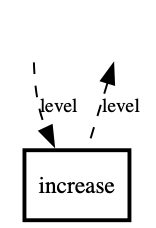

In [10]:
v.save_graph()